In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# carrega o CSV original
df = pd.read_csv("../Data/ScreenTime vs MentalWellness.csv")

print("Shape:", df.shape)
df.info()


Shape: (400, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  soc

In [14]:
# remover colunas vazias tipo Unnamed
df = df.loc[:, ~df.columns.str.contains("^Unnamed", na=False)]

# normalizar nomes de colunas
df.columns = (
    df.columns.str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace(r"[^\w_]", "", regex=True)
    .str.lower()
)

# ver valores únicos das categóricas
for col in ["gender","occupation","work_mode"]:
    if col in df.columns:
        print(f"\n{col}:\n", df[col].value_counts())



gender:
 gender
Female              222
Male                170
Non-binary/Other      8
Name: count, dtype: int64

occupation:
 occupation
Employed         207
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64

work_mode:
 work_mode
Remote       150
Hybrid       146
In-person    104
Name: count, dtype: int64


In [15]:
num_cols = [c for c in [
    "age","screen_time_hours","work_screen_hours","leisure_screen_hours",
    "productivity_0_100","mental_wellness_index_0_100"
] if c in df.columns]

df[num_cols].describe()


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,productivity_0_100,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,54.306500,20.326750
std,7.46608,2.491058,1.931321,2.220896,15.020054,20.376793
min,16.00000,1.000000,0.110000,0.890000,20.600000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,43.600000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,51.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,63.000000,30.650000
max,60.00000,19.170000,12.040000,13.350000,100.000000,97.000000


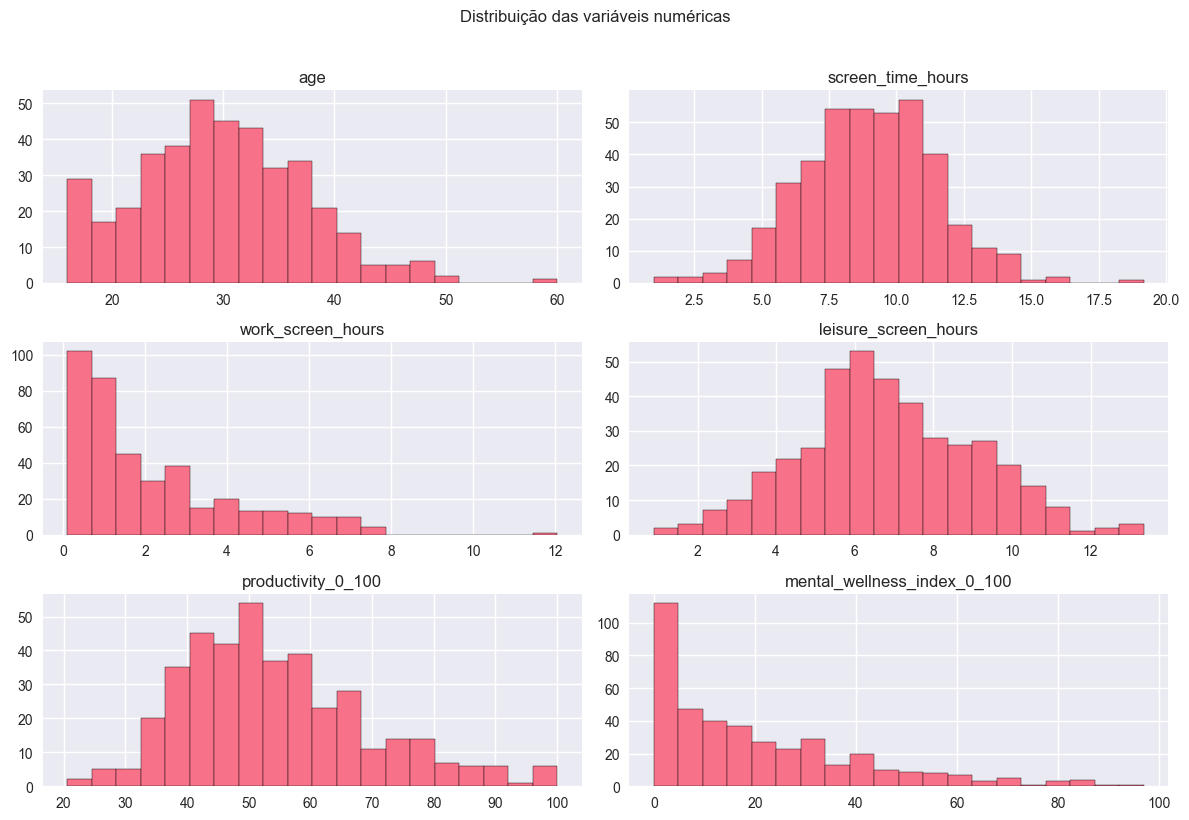

In [16]:
df[num_cols].hist(bins=20, figsize=(12,8), edgecolor="black")
plt.suptitle("Distribuição das variáveis numéricas", y=1.02)
plt.tight_layout()
plt.show()


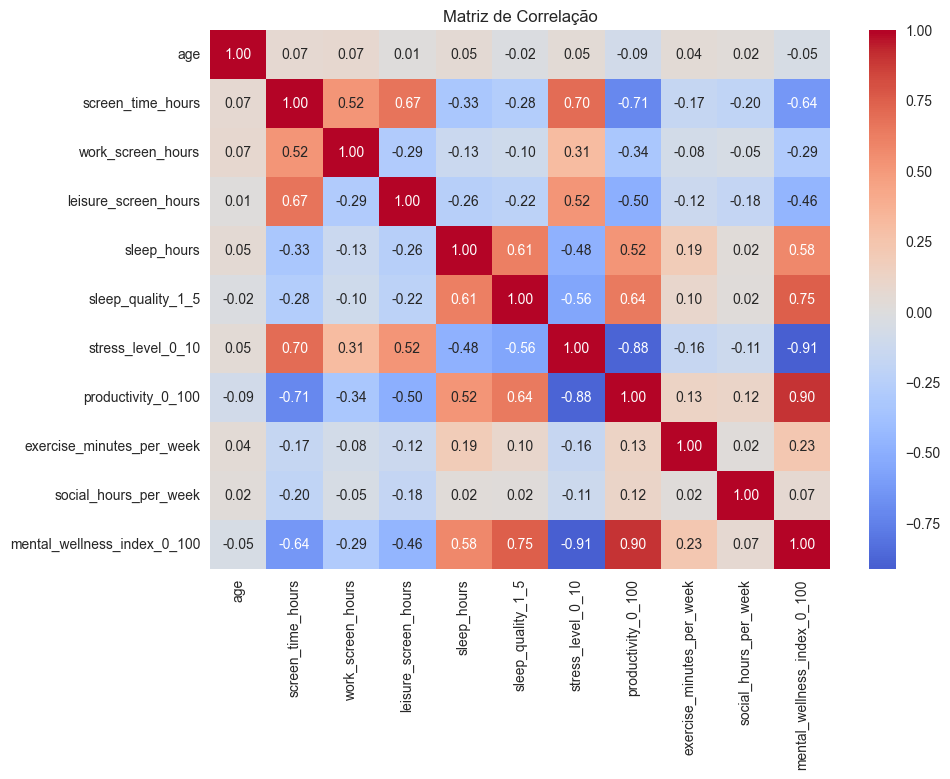

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()


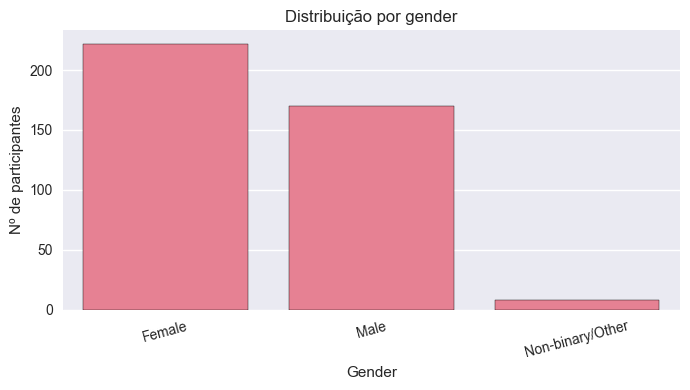

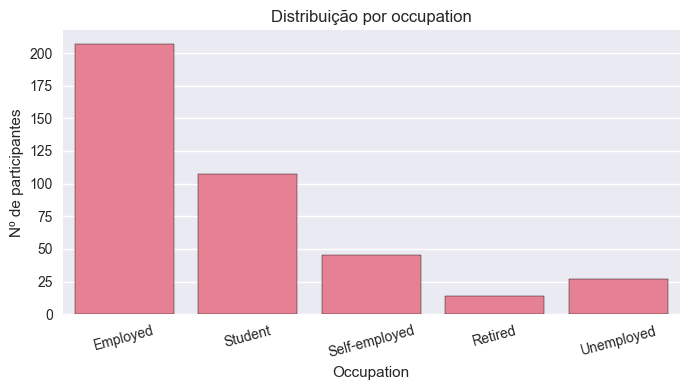

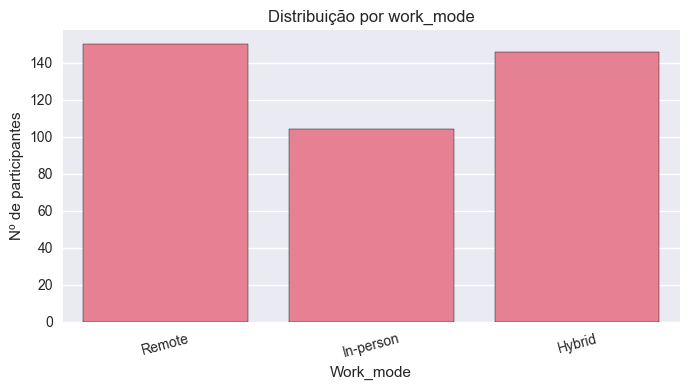

In [18]:
for col in ["gender","occupation","work_mode"]:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, data=df, edgecolor="black")
        plt.title(f"Distribuição por {col}")
        plt.xlabel(col.capitalize())
        plt.ylabel("Nº de participantes")
        plt.xticks(rotation=15)
        plt.tight_layout()
        plt.show()


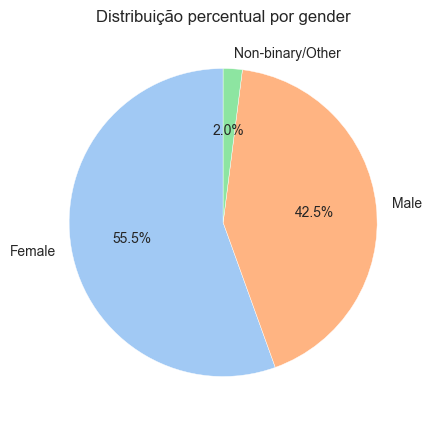

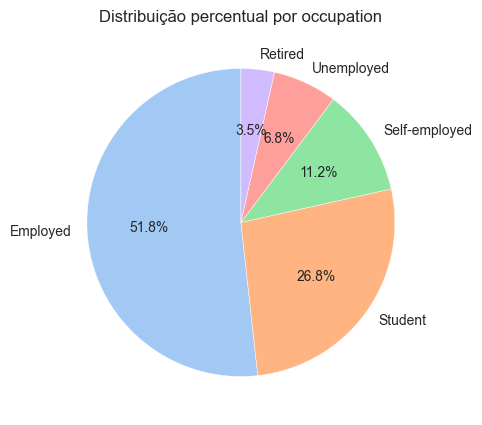

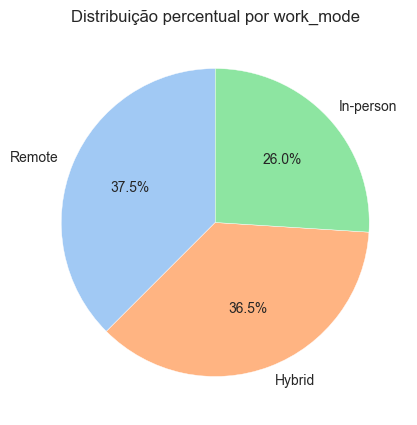

In [19]:
for col in ["gender","occupation","work_mode"]:
    if col in df.columns:
        plt.figure(figsize=(5,5))
        data = df[col].value_counts()
        plt.pie(
            data.values,
            labels=data.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("pastel"),
            wedgeprops={"edgecolor": "white"}
        )
        plt.title(f"Distribuição percentual por {col}")
        plt.show()


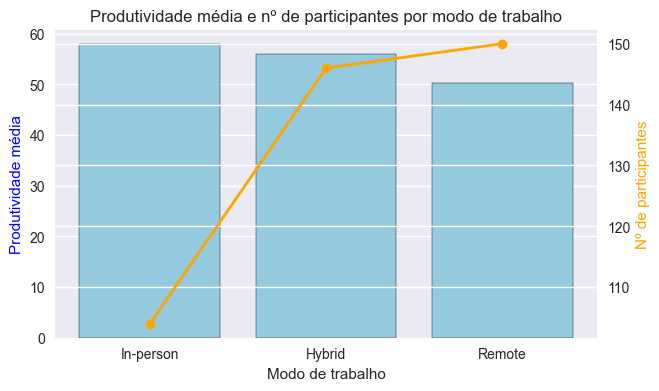

In [20]:
if {"work_mode","productivity_0_100"}.issubset(df.columns):
    stats = df.groupby("work_mode")["productivity_0_100"].agg(["mean","count"]).sort_values("mean", ascending=False)

    fig, ax1 = plt.subplots(figsize=(7,4))
    sns.barplot(x=stats.index, y=stats["mean"], edgecolor="black", ax=ax1, color="skyblue")
    ax1.set_ylabel("Produtividade média", color="blue")
    ax1.set_xlabel("Modo de trabalho")
    ax1.set_title("Produtividade média e nº de participantes por modo de trabalho")

    ax2 = ax1.twinx()
    ax2.plot(stats.index, stats["count"], color="orange", marker="o", linewidth=2)
    ax2.set_ylabel("Nº de participantes", color="orange")
    plt.show()


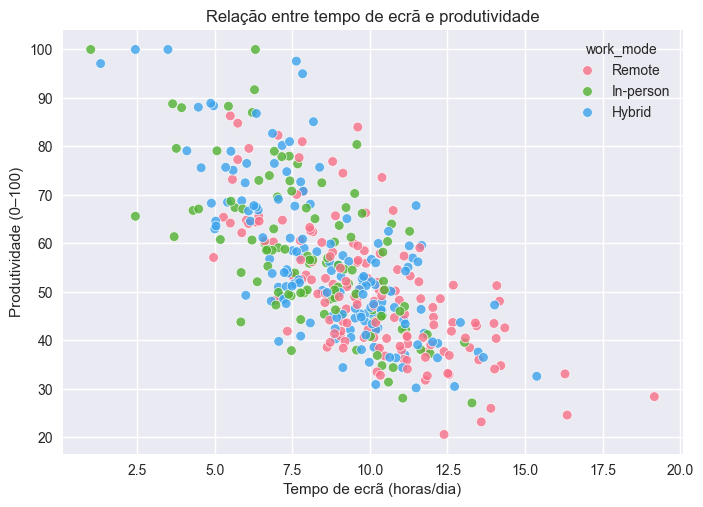

In [21]:
if {"screen_time_hours","productivity_0_100"}.issubset(df.columns):
    sns.scatterplot(
        data=df,
        x="screen_time_hours",
        y="productivity_0_100",
        hue="work_mode" if "work_mode" in df.columns else None,
        alpha=0.8,
        palette="husl"
    )
    plt.title("Relação entre tempo de ecrã e produtividade")
    plt.xlabel("Tempo de ecrã (horas/dia)")
    plt.ylabel("Produtividade (0–100)")
    plt.show()


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_24320\999930313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="work_mode", y="productivity_0_100", data=df, palette="pastel")


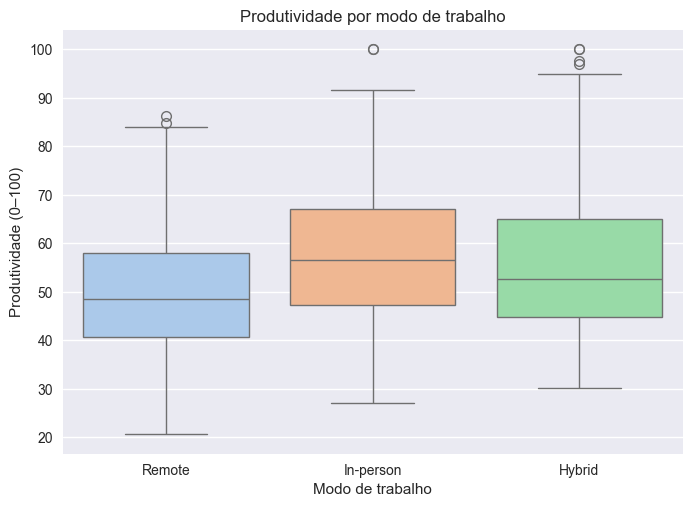

In [22]:
if {"work_mode","productivity_0_100"}.issubset(df.columns):
    sns.boxplot(x="work_mode", y="productivity_0_100", data=df, palette="pastel")
    plt.title("Produtividade por modo de trabalho")
    plt.ylabel("Produtividade (0–100)")
    plt.xlabel("Modo de trabalho")
    plt.show()


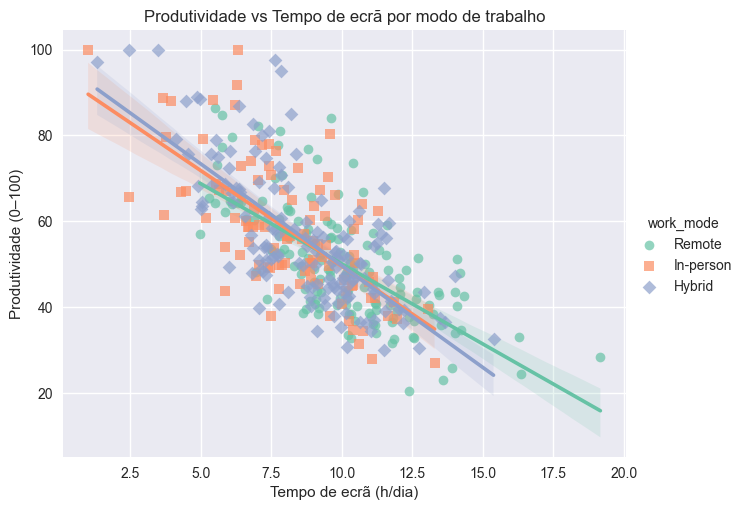

In [23]:
if {"screen_time_hours","productivity_0_100"}.issubset(df.columns):
    if "work_mode" in df.columns:
        sns.lmplot(
            data=df,
            x="screen_time_hours",
            y="productivity_0_100",
            hue="work_mode",
            aspect=1.3,
            markers=["o","s","D"],
            palette="Set2",
            scatter_kws={'alpha':0.7}
        )
        plt.title("Produtividade vs Tempo de ecrã por modo de trabalho")
        plt.xlabel("Tempo de ecrã (h/dia)")
        plt.ylabel("Produtividade (0–100)")
        plt.show()
